# 1. Project Introduction
The real estate industry plays a significant role in economic growth and development. Accurate predictions of property values can assist stakeholders, such as real estate companies, buyers, and investors, in making informed decisions. This project aims to leverage machine learning techniques to predict median house values based on various factors, such as location, pollution levels, accessibility to highways, and demographic characteristics.


## Problem Statement
The real estate company seeks to improve its ability to predict house values accurately. The current prediction methods lack precision, leading to potential mispricing and loss of business opportunities. To address this issue, a robust machine learning model needs to be designed and deployed, capable of analyzing various features that impact house values.

## Study Aim
The study aims to:

1. Explore the relationships between property features and house values.
2. Develop and compare machine learning models for predicting house values.
3. Identify the best-performing model based on predictive accuracy.
4. Provide actionable insights that the company can utilize to refine its pricing strategies.

## Model Selection
To achieve accurate predictions, multiple machine learning models were tested, including Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Among these, the Random Forest Regressor consistently delivered the best results due to its ability to handle complex patterns and reduce overfitting. It outperformed other models in terms of accuracy and reliability, making it the ideal choice for this project.

# 2. Data Preparation


### 2.1  Library Imports
1. pandas: For handling and analyzing data in tabular format.
2. numpy: For numerical operations and efficient computation.
3. seaborn and matplotlib: For data visualization to uncover patterns and trends.
4. %matplotlib inline: Ensures plots are displayed directly within the notebook.
5. sklearn: Machine learning library (imported for future use).

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### 2.2 Data Loading:

The dataset (real_estate_dataset.csv) is read into a DataFrame named housing using pd.read_csv().

In [2]:
housing = pd.read_csv('real_estate_dataset.csv')

### 2.3 Data Exploration:

1. housing.head(5)--  Displays the first 5 rows of the dataset for a quick preview.
2. housing.shape--   Returns the number of rows and columns to understand the dataset's size.
3. housing.info()--   Provides an overview of the dataset, including column names, data types, and non-null counts.

In [3]:
housing.head(5)

,Area_Code,Land_Zoning,Business_Acreage,River_Proximity,Pollution_Level,Rooms_Avg,Old_Units_Rate,Distance_Centers,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Demographic_Index,Low_Status_Pop,Median_House_Value
0,0.06,17.94,2.52,-0.10,0.24,6.62,65.17,4.18,0.99,295.99,15.27,397.01,5.00,24.03
1,0.01,-0.09,7.00,0.19,0.49,6.33,78.92,4.86,2.04,241.97,17.90,396.97,9.19,21.42
2,0.09,0.00,7.24,0.12,0.65,7.24,61.00,5.10,1.93,241.90,17.77,392.86,4.20,34.67
3,0.18,-0.08,2.20,0.06,0.58,6.91,45.78,6.09,3.02,222.04,18.57,394.53,2.86,33.42
4,0.05,0.03,2.11,-0.02,0.48,7.11,54.26,6.13,3.05,221.95,18.77,396.90,5.20,36.17


In [4]:
housing.shape

(506, 14)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area_Code              506 non-null    float64
 1   Land_Zoning            506 non-null    float64
 2   Business_Acreage       506 non-null    float64
 3   River_Proximity        506 non-null    float64
 4   Pollution_Level        506 non-null    float64
 5   Rooms_Avg              501 non-null    float64
 6   Old_Units_Rate         506 non-null    float64
 7   Distance_Centers       506 non-null    float64
 8   Highway_Access         506 non-null    float64
 9   Tax_Rate               506 non-null    float64
 10  Student_Teacher_Ratio  506 non-null    float64
 11  Demographic_Index      506 non-null    float64
 12  Low_Status_Pop         506 non-null    float64
 13  Median_House_Value     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 2.4 Column Renaming:

The column name Low_Status_Pop is renamed to Low_Economic_Pop using rename() to improve clarity and align with the project's context.

In [6]:
housing.rename(columns = {'Low_Status_Pop':'Low_Economic_Pop'},inplace = True)

# 3. Data Imputation

### 3.1 Checking for Missing Values

housing.isnull().sum()- This checks for missing values in the dataset. We have identified that the Rooms_Avg column has 5 missing values, which need to be handled before analysis.

In [7]:
housing.isnull().sum()

Area_Code                0
Land_Zoning              0
Business_Acreage         0
River_Proximity          0
Pollution_Level          0
Rooms_Avg                5
Old_Units_Rate           0
Distance_Centers         0
Highway_Access           0
Tax_Rate                 0
Student_Teacher_Ratio    0
Demographic_Index        0
Low_Economic_Pop         0
Median_House_Value       0
dtype: int64

 ### 3.2 Imputation of Missing Values with Median
 
 We use SimpleImputer to replace missing values with the median of each column. The median is chosen to handle outliers effectively. 

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [9]:
imputer.statistics_

array([2.9000e-01, 5.0000e-02, 9.6550e+00, 1.0000e-02, 5.5000e-01,
       6.2200e+00, 7.7480e+01, 3.2350e+00, 5.0100e+00, 3.3002e+02,
       1.9005e+01, 3.9135e+02, 1.1325e+01, 2.1245e+01])

### 3.3 Applying Imputation and Creating a Transformed DataFrame
Description: In this step, we apply the imputer to replace the missing values with the corresponding median values. The transformed data is then stored in a new DataFrame housing_tr, maintaining the original column names to ensure consistency in the datase

In [10]:
X = imputer.transform(housing)

In [11]:
housing_tr = pd.DataFrame(X , columns=housing.columns)

**This provides summary statistics (mean, std, min, max) for the numerical features in the transformed dataset, helping assess their distribution.**

In [12]:
housing_tr.describe() 

,Area_Code,Land_Zoning,Business_Acreage,River_Proximity,Pollution_Level,Rooms_Avg,Old_Units_Rate,Distance_Centers,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Demographic_Index,Low_Economic_Pop,Median_House_Value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.614111,11.367767,11.146047,0.070751,0.556285,6.282925,68.575672,3.791245,9.542154,408.236858,18.452174,356.669862,12.649743,22.530138
std,8.605553,23.323667,6.868790,0.277677,0.151027,0.704762,28.144546,2.105516,8.707662,168.545766,2.166840,91.287772,7.143296,9.189141
min,-0.180000,-0.270000,0.390000,-0.290000,0.200000,3.950000,2.960000,0.980000,0.880000,186.880000,12.440000,0.540000,1.480000,4.930000
25%,0.100000,-0.040000,5.092500,-0.060000,0.450000,5.880000,45.015000,2.092500,3.970000,279.027500,17.287500,375.450000,6.972500,17.002500
50%,0.290000,0.050000,9.655000,0.010000,0.550000,6.220000,77.480000,3.235000,5.010000,330.020000,19.005000,391.350000,11.325000,21.245000
75%,3.637500,12.540000,18.120000,0.090000,0.647500,6.610000,94.115000,5.130000,23.810000,665.860000,20.190000,396.215000,16.950000,24.960000
max,88.890000,99.970000,27.820000,1.190000,1.080000,8.830000,100.230000,12.230000,24.210000,711.110000,22.060000,397.160000,37.890000,50.180000


**- This shows the data types of each column, helping identify any columns that need type conversion before analysis.**



In [13]:
housing.dtypes

Area_Code                float64
Land_Zoning              float64
Business_Acreage         float64
River_Proximity          float64
Pollution_Level          float64
Rooms_Avg                float64
Old_Units_Rate           float64
Distance_Centers         float64
Highway_Access           float64
Tax_Rate                 float64
Student_Teacher_Ratio    float64
Demographic_Index        float64
Low_Economic_Pop         float64
Median_House_Value       float64
dtype: object

*Duplicates are removed to ensure that the dataset contains only unique rows, preventing bias in the analysis.*

In [14]:
housing.drop_duplicates(inplace=True)

**This outputs the column names, helping verify the dataset’s features and ensure correct processing.**

In [15]:
housing.columns

Index(['Area_Code', 'Land_Zoning', 'Business_Acreage', 'River_Proximity',
       'Pollution_Level', 'Rooms_Avg', 'Old_Units_Rate', 'Distance_Centers',
       'Highway_Access', 'Tax_Rate', 'Student_Teacher_Ratio',
       'Demographic_Index', 'Low_Economic_Pop', 'Median_House_Value'],
      dtype='object')

### 3.3 Visualizing Data Distribution
We use histograms to visualize the frequency distribution of numerical columns. This helps identify patterns, detect outliers, and understand data spread. The bins=50 parameter ensures detail, and figsize makes the plots easy to view.

array([[<Axes: title={'center': 'Area_Code'}>,
        <Axes: title={'center': 'Land_Zoning'}>,
        <Axes: title={'center': 'Business_Acreage'}>,
        <Axes: title={'center': 'River_Proximity'}>],
       [<Axes: title={'center': 'Pollution_Level'}>,
        <Axes: title={'center': 'Rooms_Avg'}>,
        <Axes: title={'center': 'Old_Units_Rate'}>,
        <Axes: title={'center': 'Distance_Centers'}>],
       [<Axes: title={'center': 'Highway_Access'}>,
        <Axes: title={'center': 'Tax_Rate'}>,
        <Axes: title={'center': 'Student_Teacher_Ratio'}>,
        <Axes: title={'center': 'Demographic_Index'}>],
       [<Axes: title={'center': 'Low_Economic_Pop'}>,
        <Axes: title={'center': 'Median_House_Value'}>, <Axes: >,
        <Axes: >]], dtype=object)

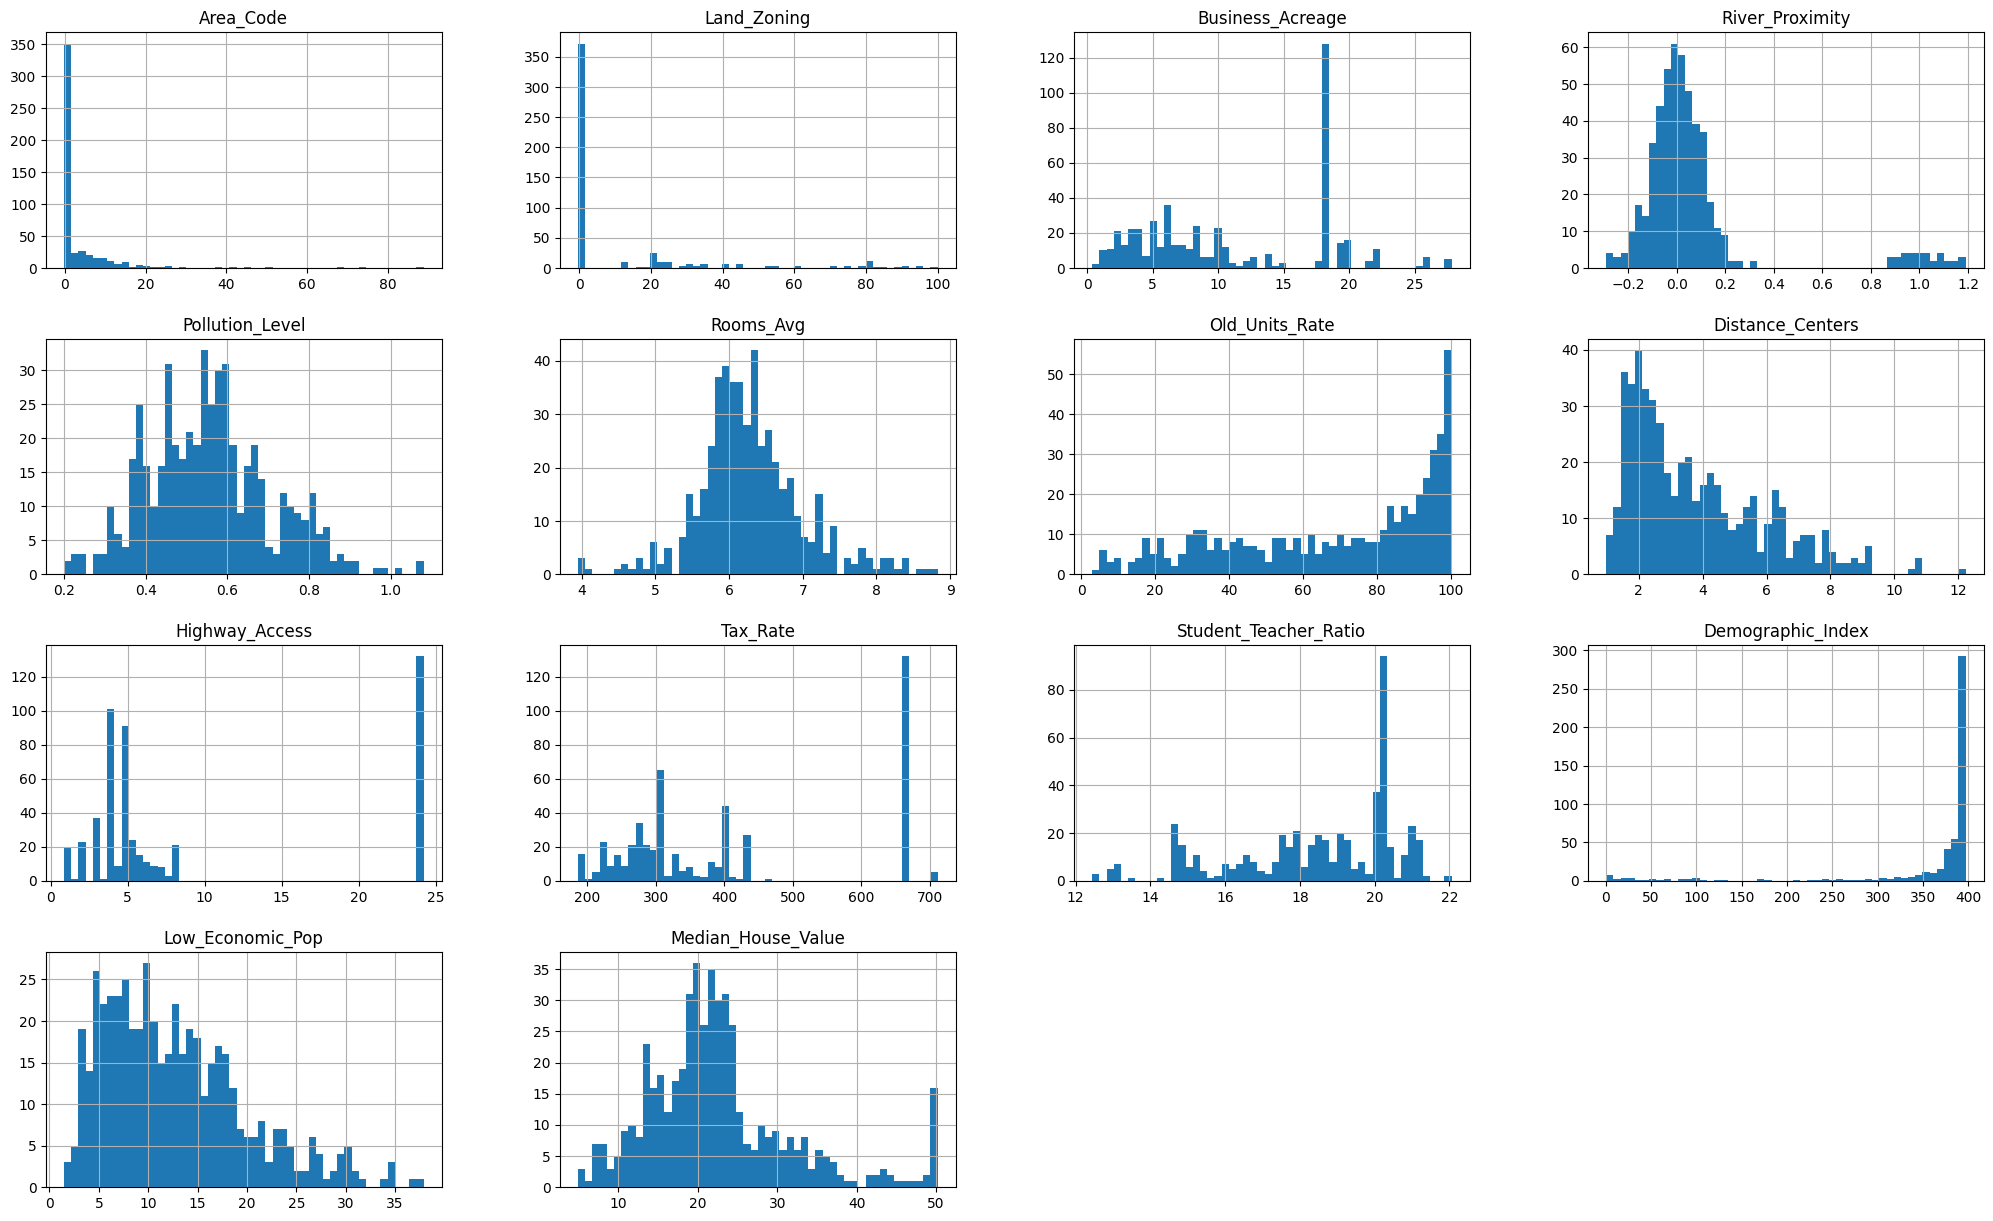

In [16]:
housing.hist(bins=50,figsize=(25,15))

# 4. Train- Test Splitting 

We split the dataset into training (80%) and test (20%) sets using train_test_split. This ensures that the model is trained on one portion of the data and tested on another, enabling us to evaluate its performance.

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test_set: {len(test_set)}\n")

Rows in train set: 404
Rows in test_set: 102



### 4.2 Implementing K-Fold Cross-Validation
We use K-Fold Cross-Validation to divide the dataset into 5 subsets, allowing the model to train and test on different portions of the data. This ensures a more robust evaluation. Shuffling is enabled to randomize the data, and random_state ensures reproducibility.

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 splits for cross-validation

for train_index, test_index in kf.split(housing):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [19]:
    print("Train indices:", train_index[:10])
    print("Test indices:", test_index[:10])

Train indices: [ 0  2  3  4  5  6  7  8  9 10]
Test indices: [ 1 13 20 21 34 43 48 49 50 52]


**We create a copy of the training set for further preprocessing and model training. Displaying the first 10 rows allows us to verify the data.**

In [20]:
housing= train_set.copy()

In [21]:
housing.head(10)

,Area_Code,Land_Zoning,Business_Acreage,River_Proximity,Pollution_Level,Rooms_Avg,Old_Units_Rate,Distance_Centers,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Demographic_Index,Low_Economic_Pop,Median_House_Value
477,15.05,0.00,18.23,0.11,0.71,5.15,97.13,2.09,24.11,666.13,20.16,349.44,24.97,11.83
15,0.57,0.05,8.15,-0.01,0.36,5.88,56.43,4.51,4.03,307.00,21.01,395.72,8.32,19.84
332,0.04,35.10,6.15,-0.06,0.40,5.92,23.34,6.57,1.02,303.92,16.91,362.25,7.88,19.19
423,7.15,-0.01,18.13,-0.04,0.59,6.26,84.98,2.06,24.13,666.01,20.20,2.48,23.33,13.22
19,0.58,-0.18,7.97,-0.05,0.55,5.94,69.41,3.72,4.03,306.94,21.15,390.88,11.29,18.14
325,0.07,-0.09,7.35,0.01,0.45,6.38,14.53,5.58,5.01,287.10,19.60,393.75,4.95,24.55
335,0.02,0.07,5.28,0.09,0.56,6.01,34.38,6.01,5.02,224.06,20.28,396.65,8.04,21.22
56,-0.06,85.09,0.69,0.05,0.41,6.25,35.69,9.22,1.99,313.01,17.47,396.81,5.69,24.62
437,15.04,-0.01,18.10,0.14,0.81,6.09,99.89,1.81,23.84,666.07,20.13,9.27,26.59,8.74
409,14.49,0.03,18.21,-0.03,0.58,6.81,99.89,1.38,23.87,666.03,20.21,179.30,19.58,27.71


# 5. Looking for Correlations

We compute the correlation matrix for numerical features to identify relationships between variables. Sorting by Median_House_Value helps determine the most relevant predictors for house prices.

In [22]:
housing_numeric = housing.select_dtypes(include=[float, int])
coor_matrix = housing_numeric.corr()
coor_matrix['Median_House_Value'].sort_values(ascending=False)

Median_House_Value       1.000000
Rooms_Avg                0.704169
Demographic_Index        0.339475
Land_Zoning              0.309715
Distance_Centers         0.228321
River_Proximity          0.162602
Old_Units_Rate          -0.339627
Pollution_Level         -0.348081
Area_Code               -0.378673
Highway_Access          -0.387449
Tax_Rate                -0.459091
Business_Acreage        -0.470433
Student_Teacher_Ratio   -0.492809
Low_Economic_Pop        -0.736323
Name: Median_House_Value, dtype: float64

### 5.1 Scatter Matrix for Key Attributes
The scatter matrix visualizes pairwise relationships among selected attributes. It helps identify patterns, trends, or potential outliers that may influence house values.

array([[<Axes: xlabel='Median_House_Value', ylabel='Median_House_Value'>,
        <Axes: xlabel='Rooms_Avg', ylabel='Median_House_Value'>,
        <Axes: xlabel='Land_Zoning', ylabel='Median_House_Value'>,
        <Axes: xlabel='Low_Economic_Pop', ylabel='Median_House_Value'>],
       [<Axes: xlabel='Median_House_Value', ylabel='Rooms_Avg'>,
        <Axes: xlabel='Rooms_Avg', ylabel='Rooms_Avg'>,
        <Axes: xlabel='Land_Zoning', ylabel='Rooms_Avg'>,
        <Axes: xlabel='Low_Economic_Pop', ylabel='Rooms_Avg'>],
       [<Axes: xlabel='Median_House_Value', ylabel='Land_Zoning'>,
        <Axes: xlabel='Rooms_Avg', ylabel='Land_Zoning'>,
        <Axes: xlabel='Land_Zoning', ylabel='Land_Zoning'>,
        <Axes: xlabel='Low_Economic_Pop', ylabel='Land_Zoning'>],
       [<Axes: xlabel='Median_House_Value', ylabel='Low_Economic_Pop'>,
        <Axes: xlabel='Rooms_Avg', ylabel='Low_Economic_Pop'>,
        <Axes: xlabel='Land_Zoning', ylabel='Low_Economic_Pop'>,
        <Axes: xlabel='Low_

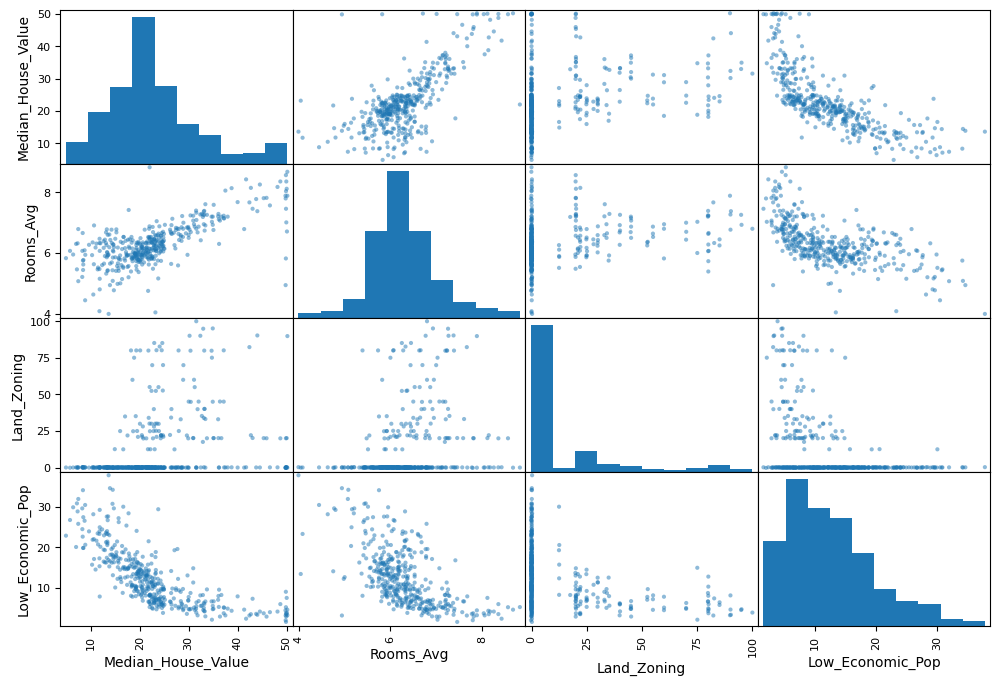

In [23]:
from pandas.plotting import scatter_matrix
attributes=['Median_House_Value','Rooms_Avg','Land_Zoning','Low_Economic_Pop']
scatter_matrix(housing[attributes],figsize=(12,8))

### 5.3 Scatter Plot of Specific Features

A scatter plot is used to examine the relationship between Low_Economic_Pop and Median_House_Value. Adjusting alpha enhances visualization by reducing overlap in densely populated areas.

<Axes: xlabel='Low_Economic_Pop', ylabel='Median_House_Value'>

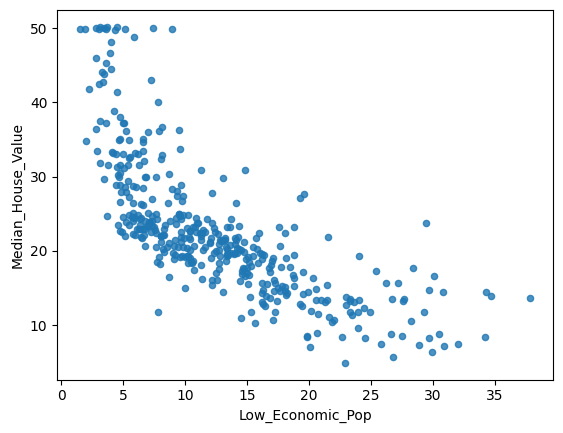

In [24]:
housing.plot(kind='scatter',x='Low_Economic_Pop',y='Median_House_Value',alpha=0.8)

# 6. Trying out Attributes combinations

We create a new feature, Demographic_Index /Pollution_Level, by dividing Demographic_Index by Pollution_Level. This feature helps analyze the combined effect of demographics and pollution levels on house values.

In [25]:
housing['Demographic_Index /Pollution_Level'] = housing['Demographic_Index']/housing['Pollution_Level']

In [50]:
housing.head()          # to see the newly created column

,Area_Code,Land_Zoning,Business_Acreage,River_Proximity,Pollution_Level,Rooms_Avg,Old_Units_Rate,Distance_Centers,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Demographic_Index,Low_Economic_Pop
0,0.06,17.94,2.52,-0.10,0.24,6.62,65.17,4.18,0.99,295.99,15.27,397.01,5.00
2,0.09,0.00,7.24,0.12,0.65,7.24,61.00,5.10,1.93,241.90,17.77,392.86,4.20
3,0.18,-0.08,2.20,0.06,0.58,6.91,45.78,6.09,3.02,222.04,18.57,394.53,2.86
4,0.05,0.03,2.11,-0.02,0.48,7.11,54.26,6.13,3.05,221.95,18.77,396.90,5.20
5,0.01,-0.01,2.13,-0.10,0.41,6.40,58.72,6.21,3.02,222.07,18.68,394.07,5.12


### 6.1 Visualizing the New Feature

A scatter plot is used to examine the relationship between the newly created feature and Median_House_Value. This visualization helps determine whether the feature is relevant for predicting house prices

<Axes: xlabel='Demographic_Index /Pollution_Level', ylabel='Median_House_Value'>

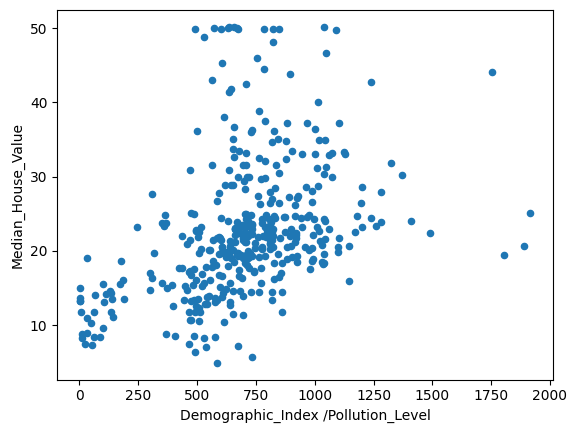

In [27]:
housing.plot(kind='scatter', x='Demographic_Index /Pollution_Level',y='Median_House_Value')

### 6.2 Splitting Features and Labels.
We prepare the data for model training by separating it into features (housing) and labels (housing_labels). The Median_House_Value column, which represents the target variable, is dropped from the training set and stored separately. This ensures that the model focuses on learning patterns from the features without being influenced directly by the target variable.

In [28]:
housing = strat_train_set.drop('Median_House_Value',axis=1)
housing_labels = strat_train_set['Median_House_Value'].copy()

**We display the first 100 rows of the Rooms_Avg feature to inspect its values and confirm data integrity before proceeding.**

In [29]:
housing['Rooms_Avg'].head(100)

0      6.62
2      7.24
3      6.91
4      7.11
5      6.40
       ... 
117    5.88
118    5.87
119    5.82
120    5.78
122    6.01
Name: Rooms_Avg, Length: 100, dtype: float64

# 7. Creating a Pipeline

A pipeline is a sequence of data transformation steps and model training combined into a single object. It automates the workflow, ensuring that the same preprocessing steps are applied consistently to both training and test data.

By using a pipeline:

1. Consistency: The same transformations are applied in the correct order every time.
2. Reproducibility: Reduces errors by streamlining the preprocessing steps.
3. Convenience: Avoids the need to manually transform data each time, simplifying code.

###   Steps in the Pipeline
1. Imputer
The SimpleImputer replaces missing values in the dataset with a specified strategy (e.g., median, mean, or mode).

2. StandardScaler

StandardScaler standardizes features by removing the mean and scaling to unit variance, effectively transforming the data into a standard normal distribution (mean=0, variance=1).



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scalar',StandardScaler()),
])


In [31]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [32]:
housing_num_tr.shape

(405, 13)

# 8. Selecting a Desired Model

The model that produces the most accurate predictions (lowest RMSE) on the training and test data will be selected.
Here we will import -

**1. Linear Regression**-  predicts a target variable by fitting a linear relationship between input features and the target. It works well for linear data but struggles with complex patterns.

**2. Decision Tree Regressor**- splits the data into subsets based on feature values to predict the target. It’s interpretable but prone to overfitting.

**3. Random Forest Regressor**- is an ensemble method that builds multiple decision trees and averages their predictions, offering better accuracy and handling of non-linear relationships.

### 8.1 Model Selection and Training

We first explored **Linear Regression** and **Decision Tree Regressor**, but these models did not perform as well as expected. We then chose the **Random Forest Regressor**, which provided more accurate results, closely matching the target values. This ensemble model, by combining multiple decision trees, significantly improved accuracy and generalization.


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

### 8.2. Making Predictions on a Subset of Data
1. Extracts a small subset of data (some_data) and the corresponding labels (some_labels) for testing.
2. Preprocesses the subset using the same pipeline (my_pipeline) to ensure consistency with the training data.
3. The predict() method generates predictions for the subset based on the trained model.

In [34]:
some_data=housing.iloc[:5]

In [35]:
some_labels = housing_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([25.9003, 35.4341, 34.013 , 34.778 , 26.9598])

In [38]:
list(some_labels)

[24.03, 34.67, 33.42, 36.17, 28.55]

# 9. Evaluation Metrics
**Mean Squared Error (MSE)**- is the average squared difference between predicted and actual values, with lower values indicating better model performance.

**Root Mean Squared Error (RMSE)**- is the square root of MSE, providing an interpretable error value in the same unit as the target variable, where lower values indicate higher accuracy.

### 9.1 Evaluating the model
1. Generate Predictions: The model predicts housing_predictions for all data in housing_num_tr.
2. Calculate MSE: Compares predicted values (housing_predictions) to actual labels (housing_labels) using mean_squared_error.
3. Calculate RMSE: Takes the square root of MSE to make the error interpretable.
The resulting rmse indicates how far, on average, the model's predictions deviate from actual values.

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [40]:
rmse

np.float64(1.3795778564921426)

# 10. Using better evaluating technique -Cross Validation
 Why We Use Cross-Validation
   
Cross-validation is a technique used to assess the performance and generalization ability of a model. It involves dividing the dataset into several subsets (folds), training the model on some of them, and testing it on the remaining ones. This process is repeated for all folds, and the results are averaged to obtain a more reliable estimate of the model's performance.

What Happens After Using Cross-Validation?

After performing cross-validation, we get a better estimate of how the model will perform on unseen data, helping us avoid overfitting and ensuring that the model generalizes well. In this code, we're using 10-fold cross-validation to evaluate the model’s performance and calculate the root mean squared error (RMSE) for each fold. By averaging these scores, we get a more robust evaluation of the model's performance.

In [41]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([3.35925495, 2.17580843, 1.82623452, 4.39186046, 3.49072168,
       5.98398154, 2.90416855, 9.03239184, 4.56833116, 3.66841477])

In [43]:
def print_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

In [44]:
print_scores(rmse_scores)

Scores: [3.35925495 2.17580843 1.82623452 4.39186046 3.49072168 5.98398154
 2.90416855 9.03239184 4.56833116 3.66841477]
Mean: 4.140116790078912
Standard deviation: 1.9893472145217839


# 11. Saving the model

 What is Joblib?
 
Joblib is a library used for serializing (saving) and deserializing (loading) Python objects, such as machine learning models. It allows you to save the trained model so that it can be reused later without needing to retrain it, which is time-consuming.

Why We Use it?

After training the model, we used joblib.dump() to save the trained RandomForest model to a file (realestate.joblib). This way, we can load the model later with joblib.load() and make predictions without retraining, which speeds up the process and ensures reproducibility

In [45]:
from joblib import dump, load
dump(model, 'realestate.joblib') 

['realestate.joblib']

# 12. Testing the model on test data
 1. Prepare the Test Data:
First, we separate the target variable (Median_House_Value) from the features (X_test) in the test set, and then we preprocess the features using the same pipeline (my_pipeline.transform(X_test)).

2. Generate Predictions:
The model makes predictions on the test data using the model.predict() function.

3. Evaluate Performance:
The predictions are compared to the actual target values (Y_test) using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to assess how well the model performs on unseen data. A lower RMSE indicates better performance.


In [46]:
X_test = strat_test_set.drop("Median_House_Value", axis=1)
Y_test = strat_test_set["Median_House_Value"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [47]:
final_rmse

np.float64(3.4009204646727196)

In [48]:
prepared_data[0]

array([-0.40814534,  0.2641564 , -1.2583837 , -0.62695626, -2.08228821,
        0.46605811, -0.13978353,  0.18240003, -0.99208138, -0.6649479 ,
       -1.49024193,  0.44242382, -1.07330485])

# 13. Using The model

When we load the model using joblib.load(), the previously trained RandomForest model is restored. You can then input new data (features) into the model, which will generate predictions based on the learned patterns from the training data.

In this, the model predicts values for a given set of features using the model.predict() method. This enables the model to make predictions for new, unseen data without the need to retrain it.



In [49]:
from joblib import dump,load 
model = load('realestate.joblib')
features= np.array([[-0.40814534,  0.2641564 , -1.2583837 , -0.62695626, -2.08228821,
        0.46605811, -0.13978353,  0.18240003, -0.99208138, -0.6649479 ,
       -1.49024193,  0.44242382, -1.07330485]])
model.predict(features)

array([25.9003])

### 14. Conclusion 

Firstly,We started by preprocessing the data, handling missing values, scaling features, and splitting it into training and test sets. After training multiple models, Random Forest Regressor was chosen due to its superior accuracy. Cross-validation ensured better generalization and avoided overfitting, while model evaluation with RMSE confirmed strong performance.By saving the model with Joblib, you ensured efficiency and reproducibility for future predictions

**How Predictions Accuracy Was Improved with ML:**

By using a Random Forest Regressor, which combines multiple decision trees, you improved the model's accuracy and generalization. Cross-validation ensured that your model would not overfit and would perform reliably on unseen data. Additionally, feature scaling, imputation, and model evaluation techniques further contributed to improving prediction accuracy.

In conclusion, you successfully applied machine learning techniques to improve the accuracy of house value predictions, ensuring the model was both robust and efficient for future use.
